## Carbon Majors Emissions

In [14]:
# importing the data from kaggle.. make sure you have kaggle.json file in your home directory

!kaggle datasets download -d joebeachcapital/carbon-majors-emissions-data --unzip

^C


In [15]:
# my import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
# using medium granularity data and pandas to read the data
df = pd.read_csv('emissions_medium_granularity.csv')



In [17]:
df.head()

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    12551 non-null  int64  
 1   parent_entity           12551 non-null  object 
 2   parent_type             12551 non-null  object 
 3   commodity               12551 non-null  object 
 4   production_value        12551 non-null  float64
 5   production_unit         12551 non-null  object 
 6   total_emissions_MtCO2e  12551 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 686.5+ KB


In [19]:
df['production_unit'].value_counts()

production_unit
Million tonnes/yr     5103
Million bbl/yr        3733
Bcf/yr                3452
Million Tonnes CO2     263
Name: count, dtype: int64

In [20]:
df.describe()

,year,production_value,total_emissions_MtCO2e
count,12551.000000,12551.000000,12551.000000
mean,1987.148116,412.677443,113.205850
std,29.202455,1357.538128,329.789848
min,1854.000000,0.004398,0.000321
25%,1973.000000,10.601353,8.785294
50%,1994.000000,63.203536,33.058688
75%,2009.000000,320.664764,102.154596
max,2022.000000,27192.000000,8646.905949


# Time for some Data Pre Processing

In [21]:
# the production unit is not the same metric as some of the other production values

df['production_unit'].value_counts()


production_unit
Million tonnes/yr     5103
Million bbl/yr        3733
Bcf/yr                3452
Million Tonnes CO2     263
Name: count, dtype: int64

In [31]:
# Drop rows where production_unit is not 'Million tonnes/yr'
df = df[df['production_unit'] == 'Million tonnes/yr']

# Display the updated DataFrame
print(df)


       year      parent_entity             parent_type            commodity  \
122    2012  Adani Enterprises  Investor-owned Company  Sub-Bituminous Coal   
123    2013  Adani Enterprises  Investor-owned Company  Sub-Bituminous Coal   
124    2014  Adani Enterprises  Investor-owned Company  Sub-Bituminous Coal   
125    2015  Adani Enterprises  Investor-owned Company  Sub-Bituminous Coal   
126    2016  Adani Enterprises  Investor-owned Company  Sub-Bituminous Coal   
...     ...                ...                     ...                  ...   
12409  2018    Wolverine Fuels  Investor-owned Company      Bituminous Coal   
12410  2019    Wolverine Fuels  Investor-owned Company      Bituminous Coal   
12411  2020    Wolverine Fuels  Investor-owned Company      Bituminous Coal   
12412  2021    Wolverine Fuels  Investor-owned Company      Bituminous Coal   
12413  2022    Wolverine Fuels  Investor-owned Company      Bituminous Coal   

       production_value    production_unit  total_e

In [32]:
df.head()

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
122,2012,Adani Enterprises,Investor-owned Company,Sub-Bituminous Coal,4.00,Million tonnes/yr,8.076362
123,2013,Adani Enterprises,Investor-owned Company,Sub-Bituminous Coal,4.09,Million tonnes/yr,8.258080
124,2014,Adani Enterprises,Investor-owned Company,Sub-Bituminous Coal,7.92,Million tonnes/yr,15.991196
125,2015,Adani Enterprises,Investor-owned Company,Sub-Bituminous Coal,10.36,Million tonnes/yr,20.917777
126,2016,Adani Enterprises,Investor-owned Company,Sub-Bituminous Coal,11.45,Million tonnes/yr,23.118586


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5103 entries, 122 to 12413
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    5103 non-null   int64  
 1   parent_entity           5103 non-null   object 
 2   parent_type             5103 non-null   object 
 3   commodity               5103 non-null   object 
 4   production_value        5103 non-null   float64
 5   production_unit         5103 non-null   object 
 6   total_emissions_MtCO2e  5103 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 318.9+ KB


In [37]:
# ok lets remove the columns that are not needed
df.drop(['production_unit'], axis=1, inplace=True)

In [38]:
df.head()

,year,parent_entity,parent_type,commodity,production_value,total_emissions_MtCO2e
122,2012,Adani Enterprises,Investor-owned Company,Sub-Bituminous Coal,4.00,8.076362
123,2013,Adani Enterprises,Investor-owned Company,Sub-Bituminous Coal,4.09,8.258080
124,2014,Adani Enterprises,Investor-owned Company,Sub-Bituminous Coal,7.92,15.991196
125,2015,Adani Enterprises,Investor-owned Company,Sub-Bituminous Coal,10.36,20.917777
126,2016,Adani Enterprises,Investor-owned Company,Sub-Bituminous Coal,11.45,23.118586


In [39]:
# now we can take parent_entity and parent_type and commodit and encode them
df['parent_entity'].value_counts()

df['parent_type'].value_counts()

df['commodity'].value_counts()

# lets encode the parent_entity and parent_type and commodity using sk learn label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['parent_entity'] = le.fit_transform(df['parent_entity'])
df['parent_type'] = le.fit_transform(df['parent_type'])
df['commodity'] = le.fit_transform(df['commodity'])

df.head()


,year,parent_entity,parent_type,commodity,production_value,total_emissions_MtCO2e
122,2012,0,0,4,4.00,8.076362
123,2013,0,0,4,4.09,8.258080
124,2014,0,0,4,7.92,15.991196
125,2015,0,0,4,10.36,20.917777
126,2016,0,0,4,11.45,23.118586


In [40]:
# now we can check for missing values
df.isnull().sum()

year                      0
parent_entity             0
parent_type               0
commodity                 0
production_value          0
total_emissions_MtCO2e    0
dtype: int64

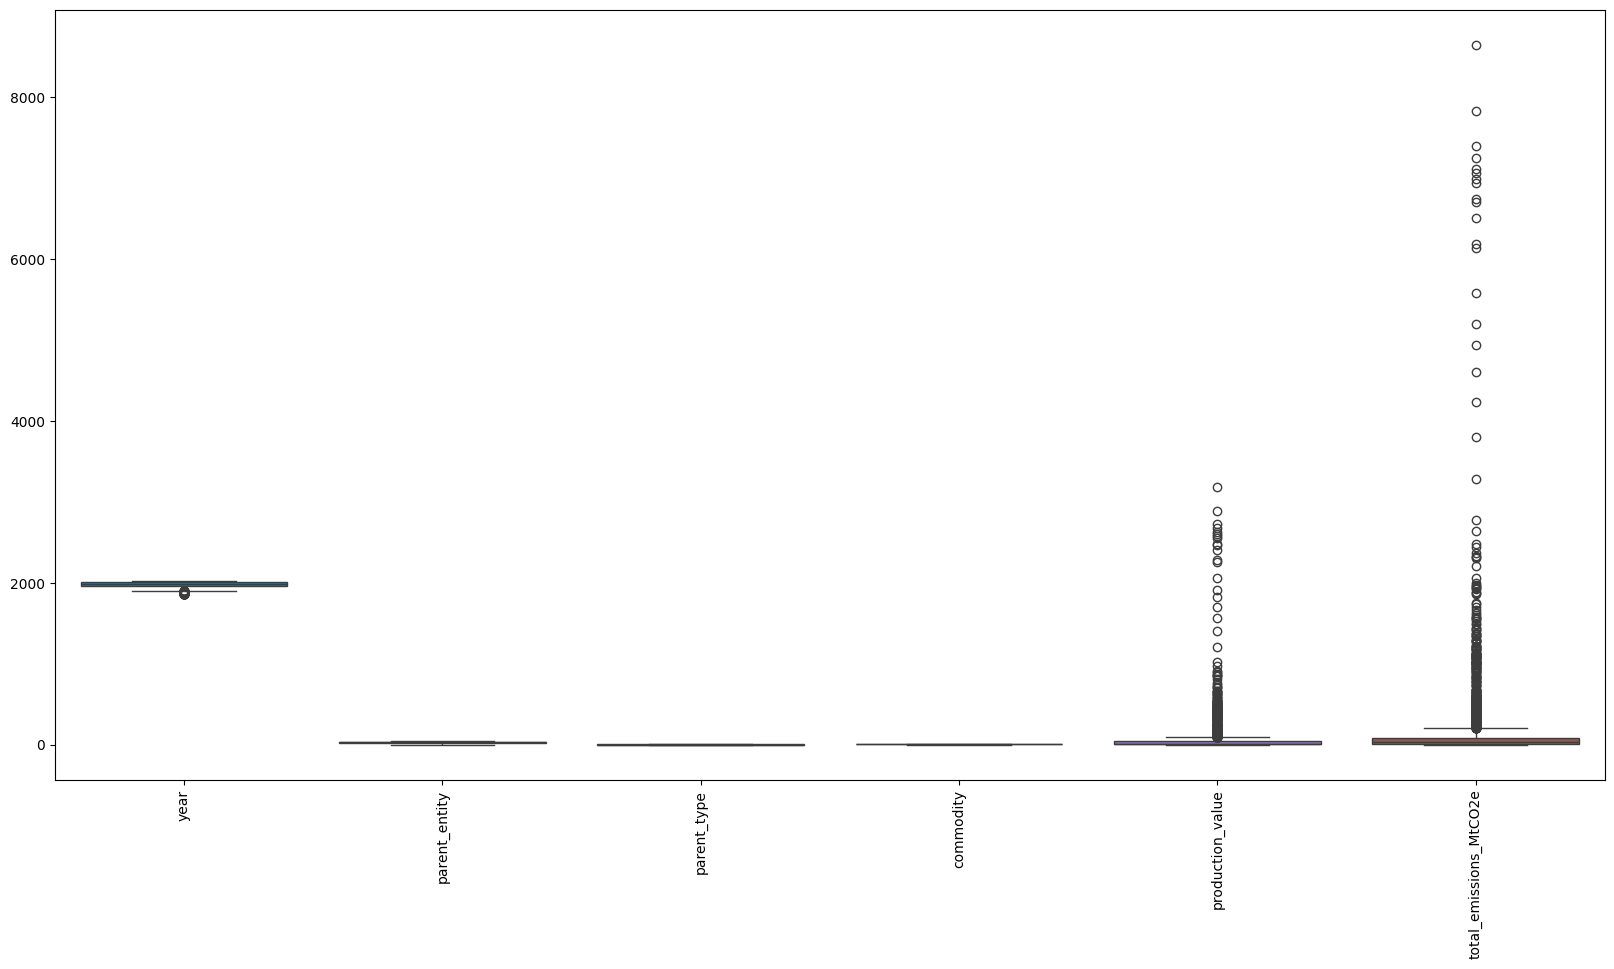

In [41]:
#NIce! no missing values!!!! Now we can move on to the next step which is to check for outliers
# lets check for outliers in the data
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()



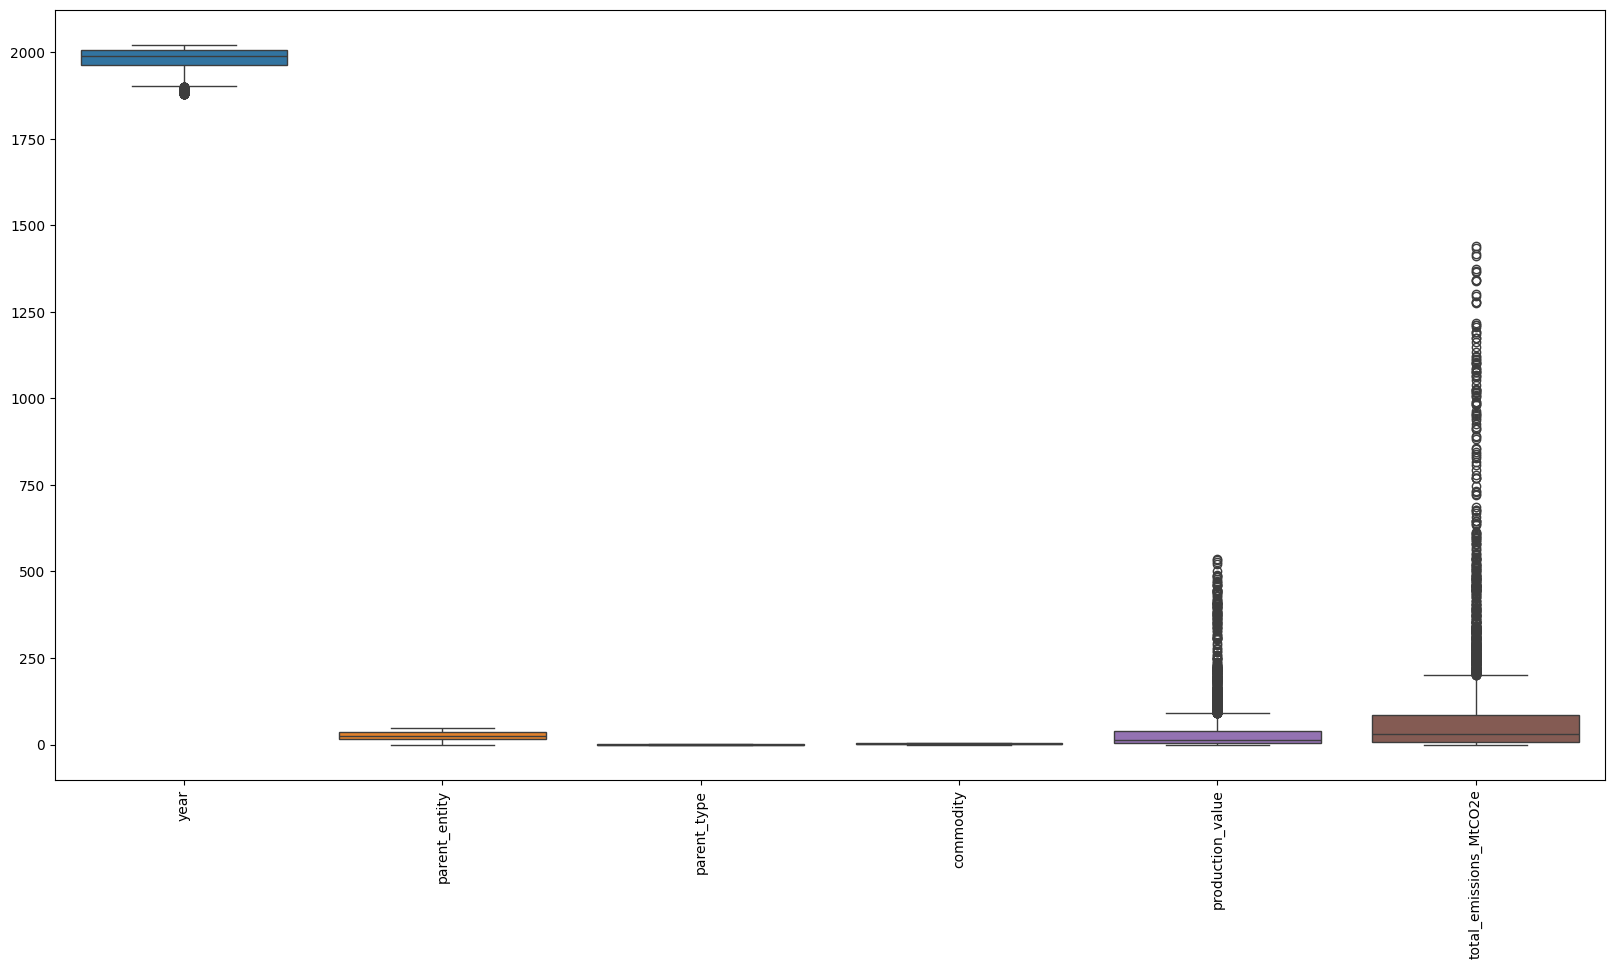

In [42]:
# umm there are a lot of outliers in the data.. lets remove them
from scipy.stats import zscore

z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

# lets check for outliers again
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [43]:
# now that the outliers are removed, we can move on to the next step and check how many values are there in each column
df['parent_entity'].value_counts()

df['parent_type'].value_counts()

df['commodity'].value_counts()


commodity
1    1294
3    1060
2     984
4     647
5     611
0     367
Name: count, dtype: int64

In [44]:
df.shape

(4963, 6)

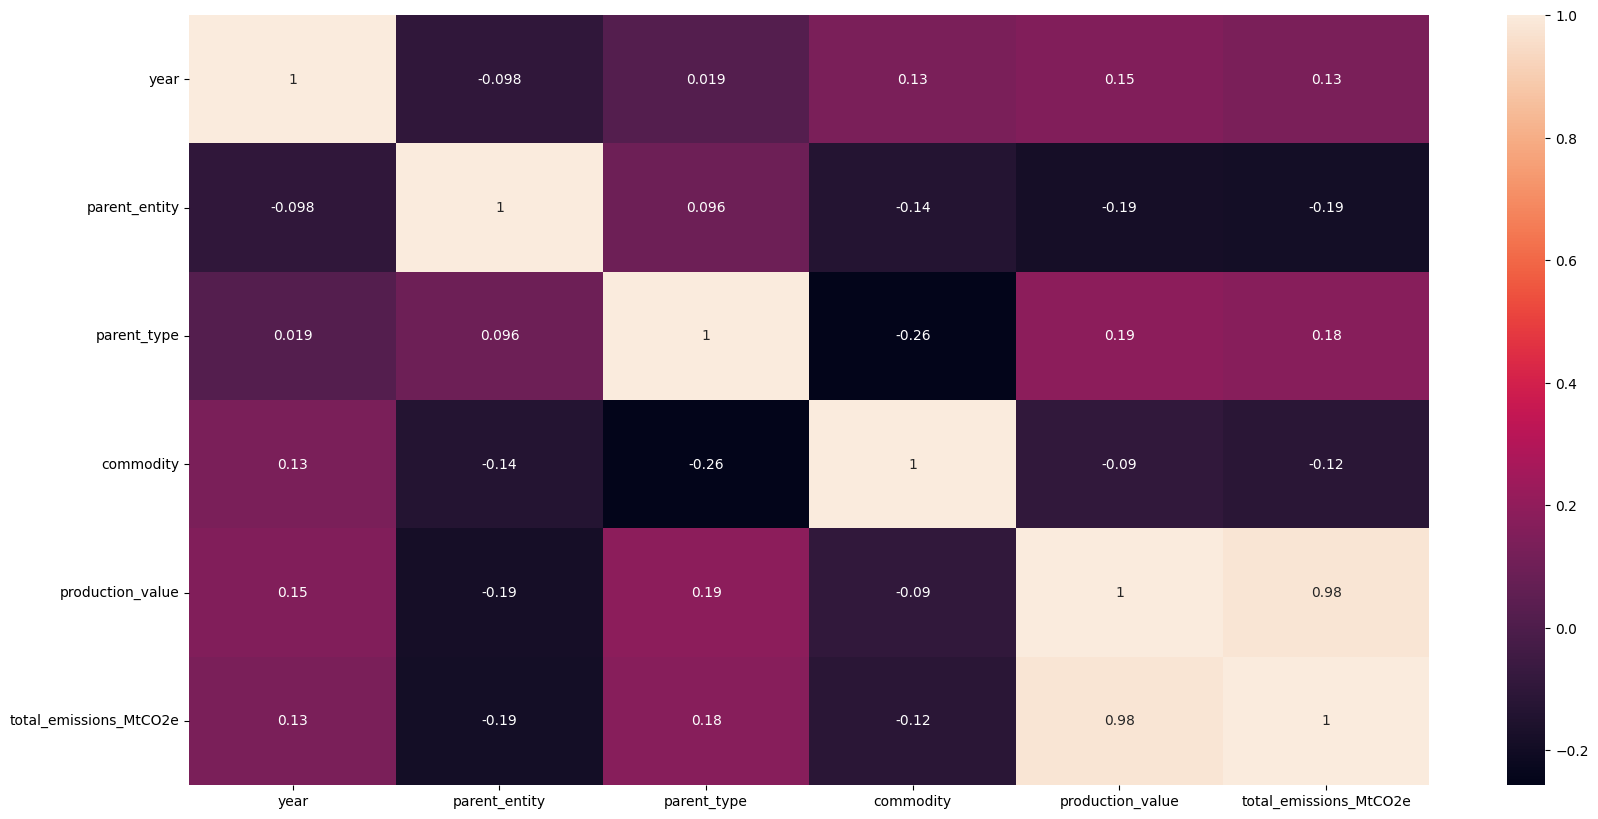

In [45]:
# Ok thats not bad! we have 1000 rows and 5 columns.. now we can move on to the next step and check the correlation between the columns
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [69]:
# lets try to pridcit the total_emissions_MtCO2e using the other columns except the production value column

y = df['total_emissions_MtCO2e']

X = df.drop(['production_value', 'total_emissions_MtCO2e'], axis=1)



In [70]:
# now lets split the data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#lets jumble all the data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)

# now we can use linear regression to predict the total_emissions_MtCO2e

# AI Models 

## Liner Reg 

In [71]:
# now lets make a LInr regression model!!
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

# lets check the score of the model
model.score(X_test, y_test)

0.09600869553150138

In [72]:
# lets try decision tree regressor
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

# lets check the score of the model
model.score(X_test, y_test)



0.9884566473006541

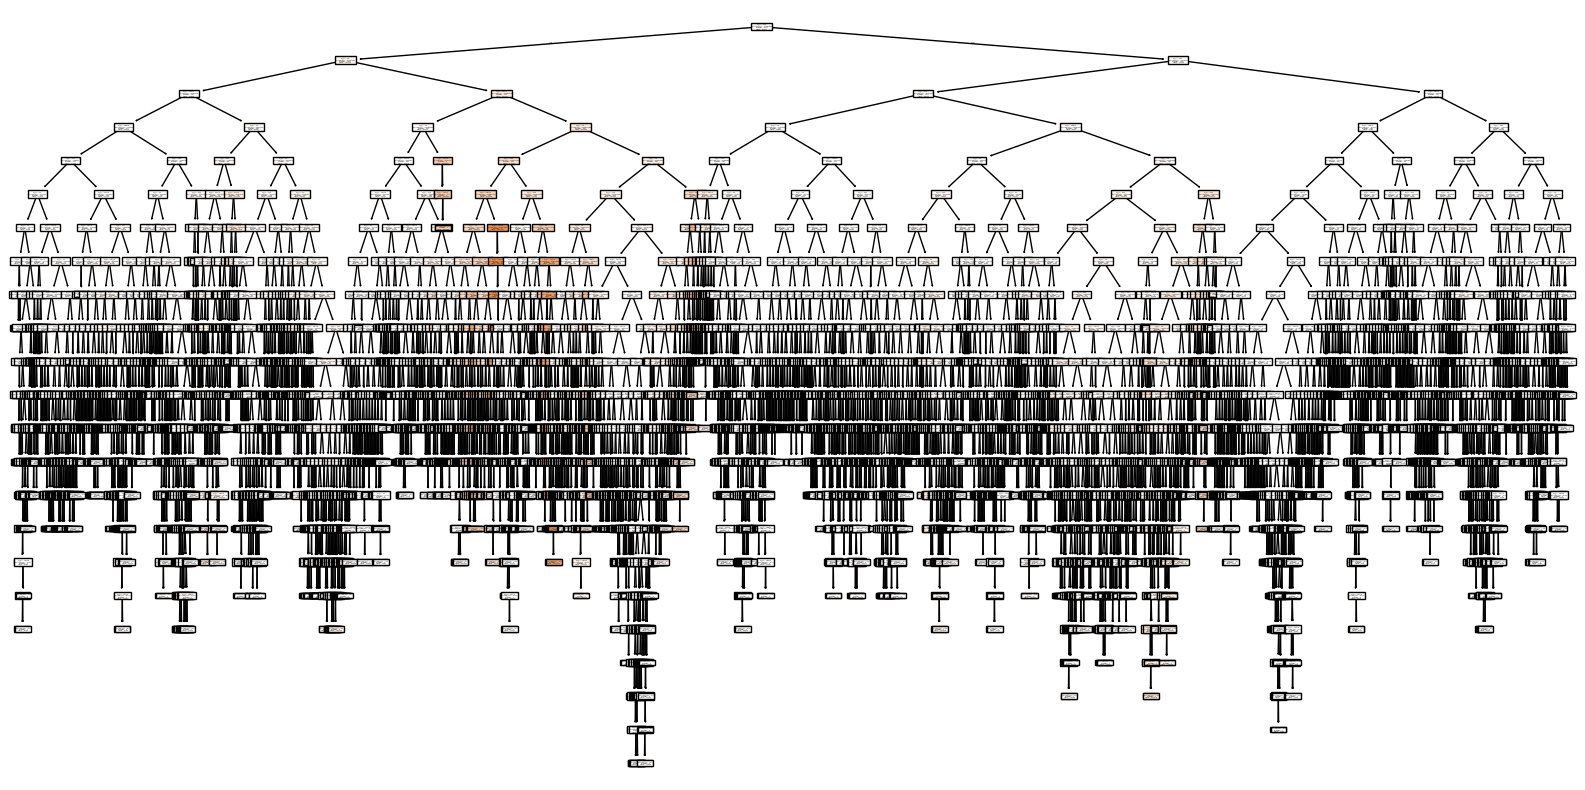

In [73]:
# now lets graph the tree
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True)
plt.show()



In [74]:
# huh... thats big.... lets prune a little bit

model = DecisionTreeRegressor(ccp_alpha=0.01)

model.fit(X_train, y_train)

# lets check the score of the model

model.score(X_test, y_test)

0.9883687127440172

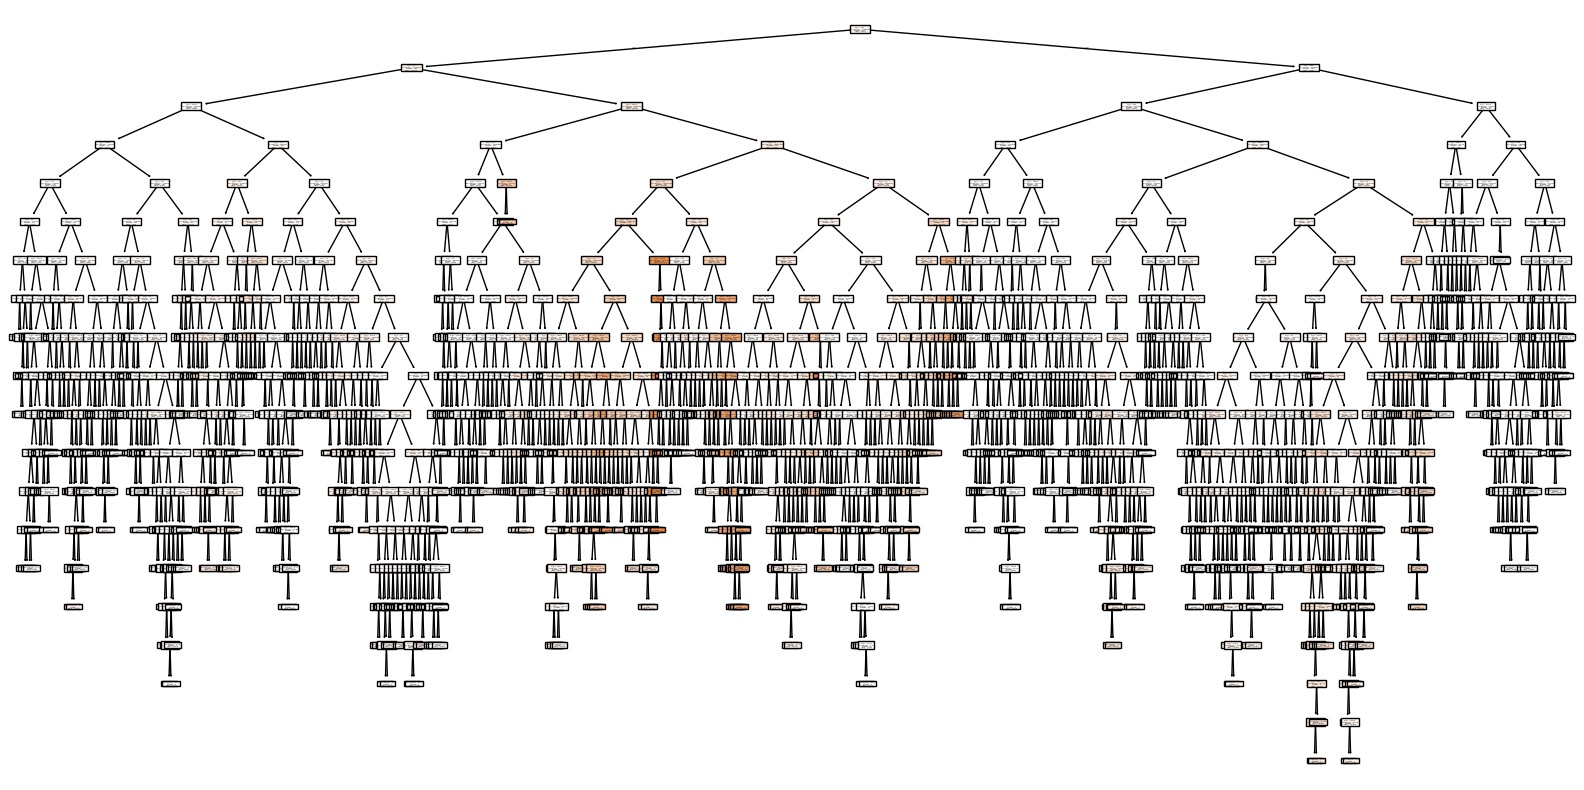

In [75]:
# lets graph the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True)
plt.show()


In [76]:
# now for some fun! lets try random forest regressor, the most over kill model for this dataset
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

# lets check the score of the model
model.score(X_test, y_test)

0.9866943778968714

<Axes: xlabel='None'>

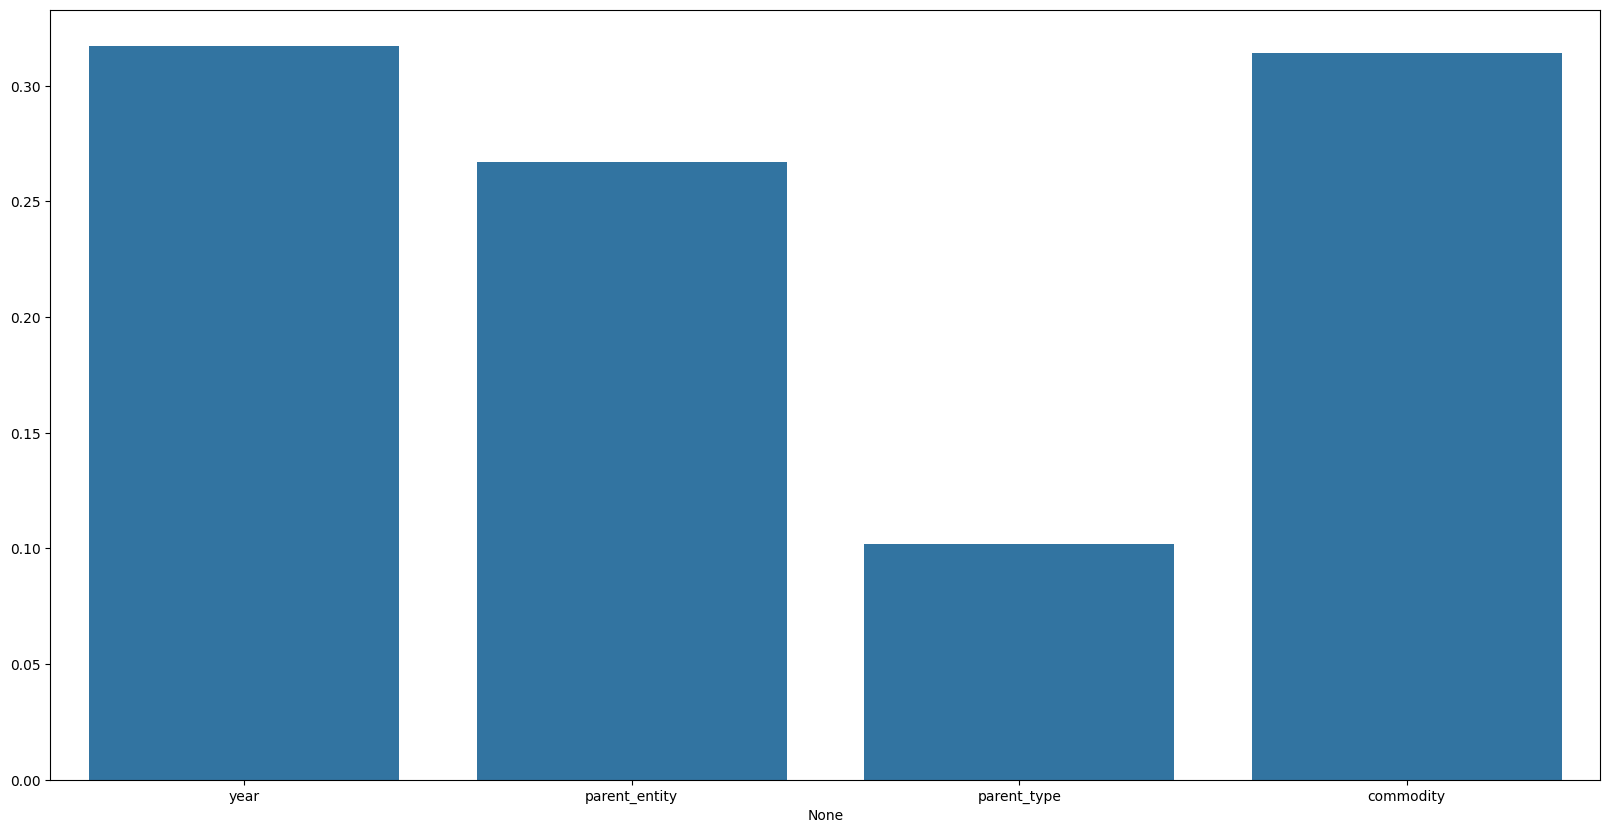

In [77]:
# HUH THATS GOOD! let grapgh the feature importance
plt.figure(figsize=(20, 10))
sns.barplot(x=X.columns, y=model.feature_importances_)

# Lets try pridicting only based on year

In [78]:
# lets try to predict the total_emissions_MtCO2e only using year and parent_entity
X = df[['year', 'parent_entity']]
y = df['total_emissions_MtCO2e']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [79]:
# let  try all 3 modles again
lr = LinearRegression()

lr.fit(X_train, y_train)

# lets check the score of the model
lr.score(X_test, y_test)

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

# lets check the score of the model
dt.score(X_test, y_test)

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

# lets check the score of the model
rf.score(X_test, y_test)

#lets print and compare all 3 models
print('Linear Regression:', lr.score(X_test, y_test))
print('Decision Tree:', dt.score(X_test, y_test))
print('Random Forest:', rf.score(X_test, y_test))

Linear Regression: 0.04684893164318471
Decision Tree: -0.14588815379221187
Random Forest: 0.07936350043117502


In [ ]:
# yaaa lets not do that.... 

In [81]:
# time for some hyperparameter tunning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 120],
    'max_depth': [10, 20, 30, 40, 50]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)

# lets check the best parameters
grid.best_params_

# lets check the score of the model
grid.score(X_test, y_test)

0.26588581026503166

In [ ]:
# now Ik that 20% is not a good score but you have to rember that we are only using 2 columns to predict the total_emissions_MtCO2e an also that it was inisiaclly 7% so this is a good improvement

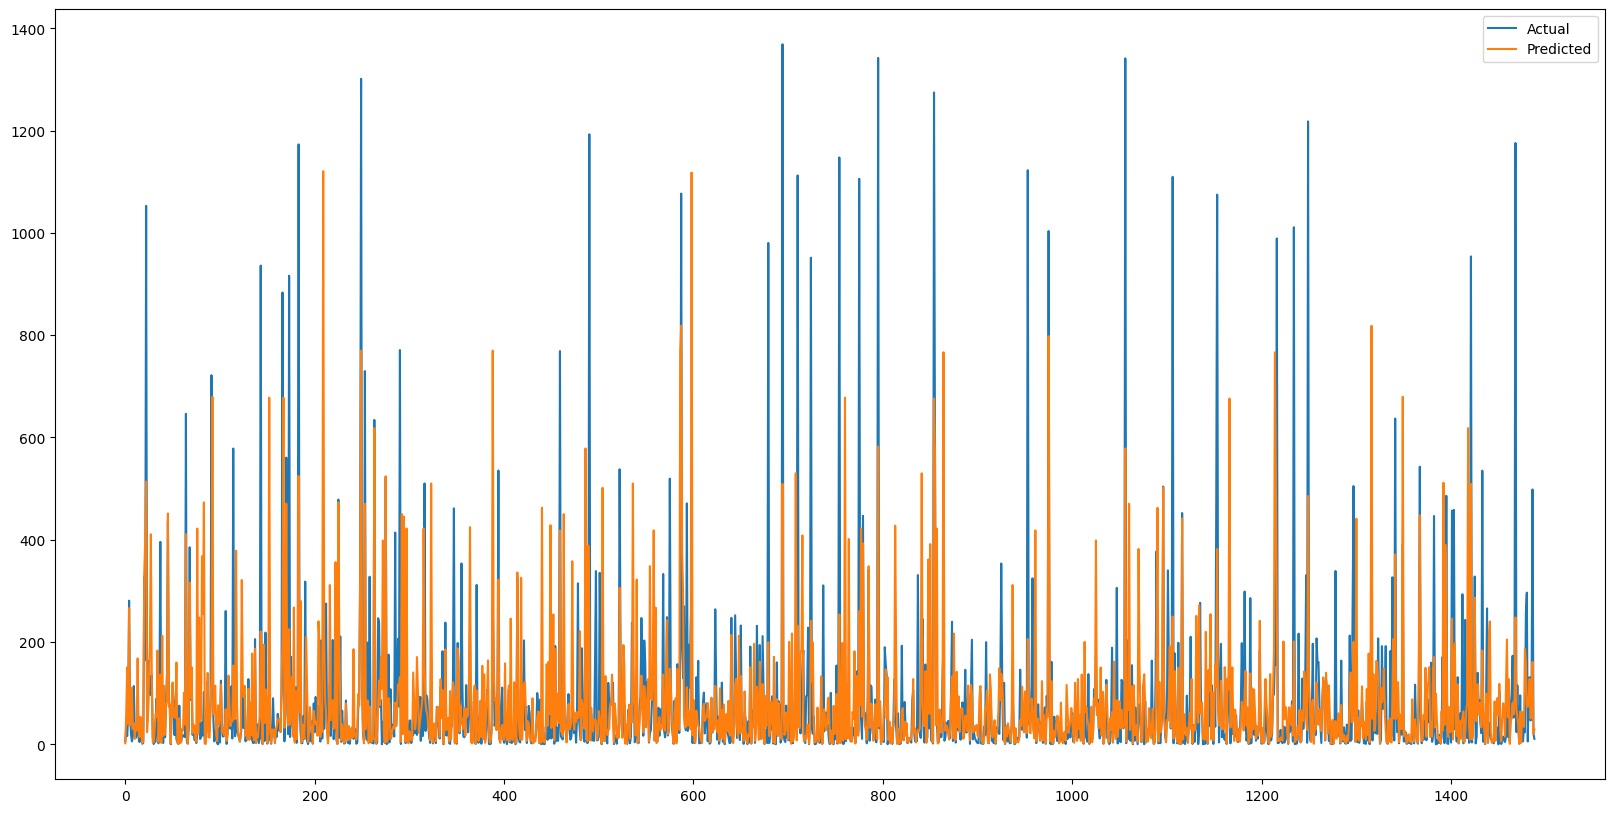

In [82]:
# lastly some fun graoghs to see the difference between the actual and predicted values
y_pred = grid.predict(X_test)

plt.figure(figsize=(20, 10))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# and thats it! we have successfully predicted the total_emissions_MtCO2e using the year and parent_entity columns